## Run bash commands from notebook

In [ ]:
!pip install tqdm

In [ ]:
!pip install gensim

## Import necessary modules

In [244]:
import pandas as pd
import time
import datetime as dt
import numpy as np
import requests
import urllib3
import json 
import random 
from tqdm import tqdm
import pickle 
import gensim
import string
import codecs
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from collections import defaultdict

sns.set()

%matplotlib inline


urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

## Get all courses at NTNU

In [2]:
res = requests.get("http://www.ime.ntnu.no/api/course/-")

In [3]:
res_json = json.loads(res.text)

In [4]:
len(res_json["course"])

5586

In [5]:
res_json["course"][0]

{'code': 'MA3402',
 'name': 'Analyse på mangfoldigheter',
 'norwegianName': 'Analyse på mangfoldigheter',
 'newNorwegianName': 'Analyse på mangfoldigheter',
 'englishName': 'Analysis on Manifolds',
 'versionCode': '1'}

In [6]:
random.choice(res_json["course"])

{'code': '4TOLK3E14',
 'name': 'Tolking og ledsaging for døvblinde 2',
 'norwegianName': 'Tolking og ledsaging for døvblinde 2',
 'newNorwegianName': 'Tolke for og føre døvblinde 2',
 'englishName': 'Interpreting for and guiding deafblind individuals 2',
 'versionCode': 'A'}

In [9]:
def get_grades(emne):
    try:
        res = requests.get("https://grades.no/api/courses/{}/grades.json".format(emne))
        grades = json.loads(res.text)
    except Exception as e:
        print(e)
        grades = {}
    return grades

In [10]:
get_grades("TDT4173")

[{'semester_code': 'H2008',
  'average_grade': 3.533333333333333,
  'passed': 0,
  'a': 7,
  'b': 1,
  'c': 3,
  'd': 2,
  'e': 1,
  'f': 1},
 {'semester_code': 'H2009',
  'average_grade': 3.03125,
  'passed': 0,
  'a': 7,
  'b': 6,
  'c': 11,
  'd': 2,
  'e': 1,
  'f': 5},
 {'semester_code': 'H2010',
  'average_grade': 3.230769230769231,
  'passed': 0,
  'a': 6,
  'b': 6,
  'c': 8,
  'd': 3,
  'e': 0,
  'f': 3},
 {'semester_code': 'H2011',
  'average_grade': 2.576923076923077,
  'passed': 0,
  'a': 2,
  'b': 5,
  'c': 9,
  'd': 3,
  'e': 4,
  'f': 3},
 {'semester_code': 'H2012',
  'average_grade': 2.657142857142857,
  'passed': 0,
  'a': 3,
  'b': 17,
  'c': 26,
  'd': 9,
  'e': 7,
  'f': 8},
 {'semester_code': 'H2013',
  'average_grade': 2.9565217391304346,
  'passed': 0,
  'a': 9,
  'b': 14,
  'c': 8,
  'd': 4,
  'e': 3,
  'f': 8},
 {'semester_code': 'H2014',
  'average_grade': 2.7666666666666666,
  'passed': 0,
  'a': 12,
  'b': 14,
  'c': 9,
  'd': 7,
  'e': 9,
  'f': 9},
 {'semes

In [15]:
grades = {}
for course in tqdm(res_json["course"]):
    grades[course["code"]] = get_grades(course["code"])

 66%|██████▋   | 3704/5586 [28:02<14:14,  2.20it/s]

Expecting value: line 1 column 1 (char 0)


 88%|████████▊ | 4893/5586 [34:58<04:57,  2.33it/s]

HTTPSConnectionPool(host='grades.no', port=443): Max retries exceeded with url: /api/courses/IINI3013/grades.json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000027670A7BA58>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))


100%|██████████| 5586/5586 [54:50<00:00,  1.70it/s]


In [16]:
pickle.dump(grades, open("grades.dict", "wb"))

In [18]:
pickle.dump(res_json, open("course_desc.dict", "wb"))

In [19]:
grades["TDT4171"]

[{'semester_code': 'V2008',
  'average_grade': 3.152173913043478,
  'passed': 0,
  'a': 10,
  'b': 11,
  'c': 14,
  'd': 4,
  'e': 1,
  'f': 6},
 {'semester_code': 'S2008',
  'average_grade': 3.0,
  'passed': 0,
  'a': 1,
  'b': 0,
  'c': 1,
  'd': 0,
  'e': 1,
  'f': 0},
 {'semester_code': 'V2009',
  'average_grade': 3.3076923076923075,
  'passed': 0,
  'a': 12,
  'b': 20,
  'c': 22,
  'd': 3,
  'e': 3,
  'f': 5},
 {'semester_code': 'S2009',
  'average_grade': 2.6666666666666665,
  'passed': 0,
  'a': 0,
  'b': 1,
  'c': 1,
  'd': 0,
  'e': 1,
  'f': 0},
 {'semester_code': 'V2010',
  'average_grade': 3.3506493506493507,
  'passed': 0,
  'a': 22,
  'b': 20,
  'c': 19,
  'd': 3,
  'e': 5,
  'f': 8},
 {'semester_code': 'S2010',
  'average_grade': 2.25,
  'passed': 0,
  'a': 0,
  'b': 1,
  'c': 1,
  'd': 1,
  'e': 0,
  'f': 1},
 {'semester_code': 'V2011',
  'average_grade': 3.1523809523809523,
  'passed': 0,
  'a': 10,
  'b': 26,
  'c': 53,
  'd': 7,
  'e': 4,
  'f': 5},
 {'semester_code'

In [25]:
df = pd.DataFrame(res_json["course"])

In [26]:
df.head()

,code,englishName,name,newNorwegianName,norwegianName,versionCode
0,MA3402,Analysis on Manifolds,Analyse på mangfoldigheter,Analyse på mangfoldigheter,Analyse på mangfoldigheter,1
1,MUSP4145,Chamber Music B,Kammermusikk B,Kammermusikk B,Kammermusikk B,1
2,MUSP4136,Accompaniment A,Akkompagnering A,Akkompagnering A,Akkompagnering A,1
3,MUSP4137,Secondary Instrument 1,Biinstrument 1,Biinstrument 1,Biinstrument 1,1
4,BA8304,Soil Modelling,Jordmodellering,Jordmodellering,Jordmodellering,1


In [27]:
res_json["course"][0]

{'code': 'MA3402',
 'name': 'Analyse på mangfoldigheter',
 'norwegianName': 'Analyse på mangfoldigheter',
 'newNorwegianName': 'Analyse på mangfoldigheter',
 'englishName': 'Analysis on Manifolds',
 'versionCode': '1'}

In [39]:
def get_desc(emne):
    try:
        res = requests.get("http://www.ime.ntnu.no/api/course/en/{}".format(emne)) 
        desc = json.loads(res.text)
    except Exception as e:
        print(e)
        desc = {}
    return desc

In [44]:
get_desc("TDT4171")

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [78]:
info = {}
for course in tqdm(res_json["course"]):
    info[course["code"]] = get_desc(course["code"])

100%|██████████| 5586/5586 [06:54<00:00, 13.48it/s]


In [79]:
pickle.dump(info, open("info_english.dict", "wb"))

In [192]:
info["TDT4171"]

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [92]:
doc = {}
for course in tqdm(res_json["course"]):
    if "infoType" in info[course["code"]]["course"].keys():
        #print(info[course["code"]]["course"]["infoType"])
        text = []
        for x in info[course["code"]]["course"]["infoType"]:
            if x["code"] in ["INNHOLD", "KURSMAT", "MÅL"]:
                try:
                    text.append(x["text"])
                except KeyError:
                    pass
                doc[course["code"]] = "".join(text)

100%|██████████| 5586/5586 [00:00<00:00, 164120.72it/s]


In [213]:
res = requests.get("http://www.ime.ntnu.no/api/org/-") 
org = json.loads(res.text)
org

{'orgUnit': [{'orgUnitId': 1,
   'category': 'Organisasjon',
   'acronym': 'NTNU',
   'name': 'Norges teknisk-naturvitenskapelige universitet',
   'description': 'Norges teknisk- naturvitenskapelige universitet',
   'email': 'postmottak@ntnu.no',
   'url': 'https://www.ntnu.no',
   'validFrom': '1996-01-01',
   'subUnit': [{'orgUnitId': 760,
     'category': ' ',
     'acronym': 'RE',
     'name': 'Rektor',
     'parentId': 1,
     'email': 'postmottak@ntnu.no',
     'url': 'https://www.ntnu.no/rektor',
     'validFrom': '2007-01-01',
     'subUnit': [{'orgUnitId': 1042,
       'category': 'Stab',
       'acronym': 'FO',
       'name': 'Prorektor for forskning',
       'parentId': 760,
       'email': 'postmottak@ntnu.no',
       'url': 'https://www.ntnu.no/prorektor-forskning',
       'validFrom': '2009-08-01',
       'subUnit': [{'orgUnitId': 1044,
         'category': 'Stab',
         'acronym': 'FO-STAB',
         'name': 'Prorektor forskning',
         'parentId': 1042,
         '

In [283]:
def get_subunits(unit, level):
    level+=1
    if "subUnit" in unit.keys():
        for subunit in unit["subUnit"]:
            print("\t"*level+subunit["acronym"])
            print("\t"*level+subunit["name"])
            print("\t"*level+str(subunit["orgUnitId"]))
            orgid_to_fac[subunit["orgUnitId"]] = unit["acronym"]
        return get_subunits(subunit, level)
    else:
        return False

In [284]:
level = 0
for unit in org["orgUnit"][0]["subUnit"][0]["subUnit"]:
    print(unit["acronym"])
    print(unit["name"])
    get_subunits(unit, level)

FO
Prorektor for forskning
	FO-STAB
	Prorektor forskning
	1044
NY
Prorektor for nyskaping
	NY-STAB
	Prorektor nyskaping
	1045
UTD
Prorektor for utdanning
	UTD-STAB
	Prorektor utdanning
	765
	UTD-ST
	Avdeling for studenttjenester
	1201
	UTD-SA
	Avdeling for studieadministrasjon
	1200
	UTD-UK
	Avdeling for utdanningskvalitet
	767
	UTD-UB
	NTNU Universitetsbiblioteket
	774
		UTD-UB-ADM
		Bibliotekadministrasjonen
		1050
		UTD-UB-SANT
		Bibliotekseksjon for arkitektur, naturvitenskap, teknologi og økonomi
		1051
		UTD-UB-HUMSAM
		Bibliotekseksjon for humaniora, samfunns- og utdanningsvitenskap
		1023
		UTD-UB-SKV
		Bibliotekseksjon for kultur- og vitenskapshistorie
		1024
		UTD-UB-MH
		Bibliotekseksjon for medisin og helsevitenskap
		1048
		UTD-UB-SD
		Bibliotekseksjon for samlinger og digitale tjenester
		1046
		UTD-UB-GJO
		Bibliotekseksjon i Gjøvik
		1096
		UTD-UB-ALS
		Bibliotekseksjon i Ålesund
		1115
RE-REK
Rektor og styre
HF
Det humanistiske fakultet
	HF-ADM
	HF fakultetsadministras

In [288]:
def get_fac_from_ouid(ouid):
    try:
        r = requests.get("http://www.ime.ntnu.no/api/org/{}".format(ouid)) 
        o = json.loads(r.text)
        fac = o["orgUnitDetailed"]["acronym"]
    except Exception as e:
        print(e)
        fac = None
    return fac

## Pandas <3

Create pandas DataFrame from the dictionary

In [177]:
doc_df = pd.DataFrame.from_dict(doc, orient="index", columns=["description"])

In [178]:
doc_df.head()

,description
MA3402,The course deals with fundamental concepts fro...
MUSP4145,This subject includes chambermusic- repertoire...
MUSP4136,The course includes accompaniment and ensemble...
MUSP4137,Individual lectures and independent work on th...
BA8304,"The course is given every second year, next ti..."


In [182]:
doc_df.sample(5)

,description
IMT6001,"-Academic integrity including plagiarism, self..."
MGLU4110,
SPO3030,Muscle architecture and differences in the pop...
TFY4220,"Atomic structure, crystallography, symmetries,..."
TDT4858,"For further information, see www.ntnu.edu/eit ..."


Add column with description-length for each course

In [185]:
doc_df["length"] = doc_df.description.apply(lambda x: len(x))

In [186]:
doc_df.sample(5)

,description,length
PK8213,To face the increasing complexity of technical...,1299
SANT2024,Many of the most urgent issues in the world of...,1396
HVUT8027,,0
TET5500,This course contains a specialisation project ...,1507
MEDT4165,The course includes the use of signal theory a...,907


In [196]:
doc_df["emne"] = doc_df.index.values

In [234]:
doc_df["ouid"] = doc_df.emne.apply(lambda emne: info[emne]["course"]["ouId"])

In [291]:
doc_df["label"] = doc_df.ouid.map(lambda orgid: orgid_to_fac[orgid])

In [300]:
rest = doc_df[doc_df.label.apply(lambda x: len(x)==0)].ouid.map(get_fac_from_ouid)
rest

MD4072       MH
NRS8004      MH
NRS8002      MH
AAR4805      AD
AAR4600      AD
MD4030       MH
MD4061       MH
SPRÅK8895    HF
ESTET8881    HF
AAR4918      AD
ARK8871      HF
SPRÅK8861    HF
SPRÅK8865    HF
SPRÅK8877    HF
RVI8871      HF
MD4051       MH
IFEL8000     IV
ESTET8863    HF
HMS0002      IE
NRS8003      MH
ØK8000       OK
SPRÅK8868    HF
ESTET8880    HF
AAR4906      AD
SPRÅK8863    HF
SPRÅK8882    HF
MD3004       MH
MD4053       MH
HIKU8862     HF
MD4031       MH
             ..
ESTET8871    HF
AAR4800      AD
MD3002       MH
MD3012       MH
MD3016       MH
SPRÅK8881    HF
MD4020       MH
SPRÅK8885    HF
TLOG3010     IV
SFEL8000     SU
SPRÅK8896    HF
AAR4801      AD
HMS0003      NV
HIKU8861     HF
SPRÅK8873    HF
AAR4505      AD
SPRÅK8874    HF
SPRÅK8875    HF
AAR4601      AD
MD4062       MH
MD4042       MH
KOMP1003     IE
FI8871       HF
MD3003       MH
NRSN8001     MH
SPRÅK8876    HF
MD4011       MH
AAR4901      AD
SPRÅK8869    HF
KOMP1001     IE
Name: ouid, Length: 84, 

Set the values that are missing

In [303]:
doc_df.loc[rest.index, "label"] = rest.values

Anyone without label now?

In [304]:
doc_df[doc_df.label.apply(lambda x: len(x)==0)]

,description,length,emne,ouid,label


In [306]:
doc_df.sample(5)

,description,length,emne,ouid,label
HERG3005,,0,HERG3005,855,MH
NORD1106,NORD1106 includes dialectology and history of ...,2556,NORD1106,1080,HF
HIST2007,The course will give immersion into selected t...,1501,HIST2007,1081,HF
MUSP4145,This subject includes chambermusic- repertoire...,709,MUSP4145,823,HF
TVUT8004,,0,TVUT8004,832,IE


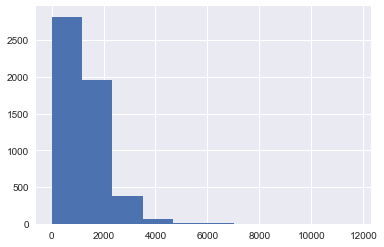

In [307]:
doc_df.length.hist()

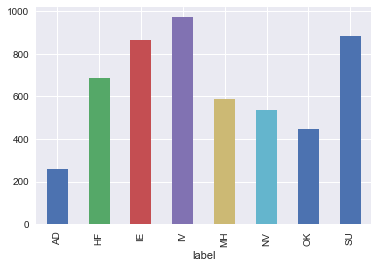

In [313]:
doc_df.groupby("label")["label"].agg("count").plot(kind="bar")

In [201]:
doc_df.description["IT3708"]

'The main focus of the course is to build intelligent systems based on two key natural concepts: evolution by natural selection and swarm intelligence.  Such intelligent systems have thousands of useful applications in fields as diverse as control theory, telecommunications, music and art.  This course discusses both methods in great detail along with providing a bit of the biological basis for each.Lecture slides, a textbook (possibly 2).  Textbooks are chosen  at the beginning of the semester.Students will get both theoretical and practical programming experience with two of the best known sub-symbolic AI methods: evolutionary algorithms and swarm intelligence algorithms. '

In [108]:
remove_punctuation = lambda d: "".join([ (c if c not in string.punctuation+"\n\r\t" else " ") for c in d])

In [202]:
remove_punctuation(doc_df.description["IT3708"])

'The main focus of the course is to build intelligent systems based on two key natural concepts  evolution by natural selection and swarm intelligence   Such intelligent systems have thousands of useful applications in fields as diverse as control theory  telecommunications  music and art   This course discusses both methods in great detail along with providing a bit of the biological basis for each Lecture slides  a textbook  possibly 2    Textbooks are chosen  at the beginning of the semester Students will get both theoretical and practical programming experience with two of the best known sub symbolic AI methods  evolutionary algorithms and swarm intelligence algorithms  '

In [110]:
stemmer = PorterStemmer()

In [117]:
?PorterStemmer

In [136]:
tokenize = lambda d: [stemmer.stem(w.lower()) for w in remove_punctuation(d).split(" ") if len(w)>0]

In [203]:
tokenize(doc_df.description["IT3708"])

['the',
 'main',
 'focu',
 'of',
 'the',
 'cours',
 'is',
 'to',
 'build',
 'intellig',
 'system',
 'base',
 'on',
 'two',
 'key',
 'natur',
 'concept',
 'evolut',
 'by',
 'natur',
 'select',
 'and',
 'swarm',
 'intellig',
 'such',
 'intellig',
 'system',
 'have',
 'thousand',
 'of',
 'use',
 'applic',
 'in',
 'field',
 'as',
 'divers',
 'as',
 'control',
 'theori',
 'telecommun',
 'music',
 'and',
 'art',
 'thi',
 'cours',
 'discuss',
 'both',
 'method',
 'in',
 'great',
 'detail',
 'along',
 'with',
 'provid',
 'a',
 'bit',
 'of',
 'the',
 'biolog',
 'basi',
 'for',
 'each',
 'lectur',
 'slide',
 'a',
 'textbook',
 'possibl',
 '2',
 'textbook',
 'are',
 'chosen',
 'at',
 'the',
 'begin',
 'of',
 'the',
 'semest',
 'student',
 'will',
 'get',
 'both',
 'theoret',
 'and',
 'practic',
 'program',
 'experi',
 'with',
 'two',
 'of',
 'the',
 'best',
 'known',
 'sub',
 'symbol',
 'ai',
 'method',
 'evolutionari',
 'algorithm',
 'and',
 'swarm',
 'intellig',
 'algorithm']

In [208]:
doc_df.sample().values

array([['Research project of 30 sp under supervision, within biophysics or medical technology.Knowledge: The student should obtain in depth knowledge within the subject area of the master thesis. Skills: The student is trained in systematic acquisition of information. The student is trained in planning and implementing a comprehensive research project using scientific methods. The student learns to write a comprehensive scientific report. General competence: The student is trained in communicating professional matters.',
        515, 'TFY4910', 867]], dtype=object)

## Tf-idf

In [209]:
?TfidfVectorizer

In [132]:
res = requests.get("https://www.textfixer.com/tutorials/common-english-words.txt")
stoplist = res.text.split(",")
stoplist

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [ ]:


vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words=stoplist)

In [157]:
trn = vec.fit_transform(doc_df.description.values)

In [160]:
vec.vocabulary_

{'cours': 8170,
 'deal': 9193,
 'fundament': 14768,
 'concept': 7115,
 'differenti': 10508,
 'topolog': 37111,
 'provid': 28321,
 'connect': 7439,
 'between': 4288,
 'analysi': 2051,
 'understand': 37679,
 'modern': 22840,
 'geometr': 15171,
 'reason': 28982,
 'topic': 36940,
 'studi': 34081,
 'manifold': 21218,
 'tangent': 35176,
 'space': 32846,
 'form': 14352,
 'local': 20644,
 'global': 15375,
 'de': 9186,
 'cohomolog': 6296,
 'stoke': 33466,
 's': 30693,
 'theorem': 35940,
 'n': 23253,
 'dimens': 10580,
 'applic': 2676,
 'announc': 2465,
 'start': 33234,
 '1': 30,
 'knowledg': 19020,
 'student': 33783,
 'ha': 15779,
 'method': 22043,
 'concern': 7232,
 'integr': 17905,
 '2': 220,
 'skill': 32154,
 'abl': 825,
 'appli': 2549,
 'hi': 16146,
 'formul': 14453,
 'solv': 32697,
 'problem': 27185,
 'analyt': 2290,
 'natur': 23302,
 'mathemat': 21594,
 'theoret': 35946,
 'physic': 25866,
 'cybernet': 8960,
 'through': 36615,
 'use': 38140,
 'tool': 36842,
 'cours deal': 8252,
 'deal funda

In [169]:
trn[0]

<1x40251 sparse matrix of type '<class 'numpy.float64'>'
	with 95 stored elements in Compressed Sparse Row format>

In [168]:
trn[0].todense(), trn[0].todense().shape

(matrix([[0., 0., 0., ..., 0., 0., 0.]]), (1, 40251))

In [149]:
np.where(trn[0].todense())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64),
 array([   30,    67,   224,   275,  1903,  2120,  2140,  2155,  2308,
         2321,  2392,  2458,  2519,  2525,  4128,  6166,  6986,  7046,
         7103,  7310,  7312,  8046,  8047,  8131,  8837,  9061,  9068,
         9075, 10388, 10460, 14230, 14331, 14360, 14649, 14652, 15049,
        15052, 15252, 15260, 17628, 18745, 18881, 18949, 19167, 20365,
        20368, 20937, 21313, 21354, 21762, 22558, 22970, 23019, 23032,
        25568, 26885, 26893, 28021, 28680, 30382, 30479, 31864, 32019,
        32404, 32438, 32553, 32942, 32944, 33176, 33178, 33491, 33513,
        33665, 33820, 34916, 35673, 35679, 35723, 36226, 36312, 36451,
        36549, 36690, 36718, 36719, 372

In [161]:
vec.vocabulary_

{'cours': 8170,
 'deal': 9193,
 'fundament': 14768,
 'concept': 7115,
 'differenti': 10508,
 'topolog': 37111,
 'provid': 28321,
 'connect': 7439,
 'between': 4288,
 'analysi': 2051,
 'understand': 37679,
 'modern': 22840,
 'geometr': 15171,
 'reason': 28982,
 'topic': 36940,
 'studi': 34081,
 'manifold': 21218,
 'tangent': 35176,
 'space': 32846,
 'form': 14352,
 'local': 20644,
 'global': 15375,
 'de': 9186,
 'cohomolog': 6296,
 'stoke': 33466,
 's': 30693,
 'theorem': 35940,
 'n': 23253,
 'dimens': 10580,
 'applic': 2676,
 'announc': 2465,
 'start': 33234,
 '1': 30,
 'knowledg': 19020,
 'student': 33783,
 'ha': 15779,
 'method': 22043,
 'concern': 7232,
 'integr': 17905,
 '2': 220,
 'skill': 32154,
 'abl': 825,
 'appli': 2549,
 'hi': 16146,
 'formul': 14453,
 'solv': 32697,
 'problem': 27185,
 'analyt': 2290,
 'natur': 23302,
 'mathemat': 21594,
 'theoret': 35946,
 'physic': 25866,
 'cybernet': 8960,
 'through': 36615,
 'use': 38140,
 'tool': 36842,
 'cours deal': 8252,
 'deal funda

In [163]:
inv_voc = {v:k for k,v in vec.vocabulary_.items()}

In [210]:
doc_df.head()

,description,length,emne,label
MA3402,The course deals with fundamental concepts fro...,840,MA3402,828
MUSP4145,This subject includes chambermusic- repertoire...,709,MUSP4145,823
MUSP4136,The course includes accompaniment and ensemble...,459,MUSP4136,823
MUSP4137,Individual lectures and independent work on th...,278,MUSP4137,823
BA8304,"The course is given every second year, next ti...",1877,BA8304,1217


In [164]:
[inv_voc[x] for x in np.where(trn[0].todense())[1]]

['1',
 '1 knowledg',
 '2',
 '2 skill',
 'abl',
 'abl appli',
 'analysi',
 'analysi understand',
 'analyt',
 'analyt geometr',
 'announc',
 'announc start',
 'appli',
 'appli hi',
 'applic',
 'applic announc',
 'between',
 'cohomolog',
 'concept',
 'concept method',
 'concern',
 'connect',
 'connect between',
 'cours',
 'cours 1',
 'cours deal',
 'cybernet',
 'de',
 'deal',
 'deal fundament',
 'differenti',
 'dimens',
 'form',
 'formul',
 'formul solv',
 'fundament',
 'fundament concept',
 'geometr',
 'geometr natur',
 'global',
 'global de',
 'ha',
 'ha knowledg',
 'hi',
 'hi knowledg',
 'integr',
 'knowledg',
 'knowledg differenti',
 'knowledg fundament',
 'knowledg student',
 'local',
 'local global',
 'manifold',
 'mathemat',
 'mathemat theoret',
 'method',
 'modern',
 'n',
 'natur',
 'natur mathemat',
 'physic',
 'problem',
 'problem analyt',
 'provid',
 'reason',
 's',
 's theorem',
 'skill',
 'skill student',
 'solv',
 'solv problem',
 'space',
 'start',
 'start cours',
 'stoke',